0.23822795785154927 0.0 0.761039397301948 1998-2002
0.14567991199338928 0.0 0.8542306303000468 1988-1997
0.3619136781221029 0.0 0.6380816888964732 1978-1987
0.18256659020313182 6.29290070516151e-05 0.8173700301788517 1968-1977
0.12036063535637873 0.7018086316647366 0.1778307207007203 1953-1967
0.9525354061728994 0.046219535865558194 0.0012450578755783233 1918-1952


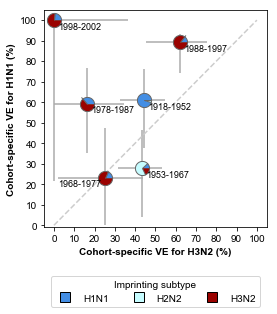

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import numpy as np
%matplotlib inline

rcParams['font.sans-serif'] = 'arial'
pal = sns.xkcd_palette(['dark sky blue', 'light sky blue', 'deep red']).as_hex()

imprinting_df = pd.read_csv('../data/imprinting_function_birth_year.csv')
pop_df = pd.read_csv('../data/demography_by_birth_year.csv')

profiles = pd.read_csv('../final_results_for_ms/15-100/DAHVcohort_subtype.profile_liks.csv', index_col='param')


imprinting_df = imprinting_df[imprinting_df.Season==2018]
pop_df = pop_df[pop_df.Season==2018]
def make_pie_scatter(X, Y, r1, r2, ax, colors, size=200, edgecolor='#666666'):
    x = [0] + np.cos(np.linspace(0, 2 * np.pi * r1, 1000)).tolist()
    y = [0] + np.sin(np.linspace(0, 2 * np.pi * r1, 1000)).tolist()
    xy1 = np.column_stack([x, y])
    s1 = np.abs(xy1).max()

    x = [0] + np.cos(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 1000)).tolist()
    y = [0] + np.sin(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 1000)).tolist()
    xy2 = np.column_stack([x, y])
    s2 = np.abs(xy2).max()

    x = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi, 1000)).tolist()
    y = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi, 1000)).tolist()
    xy3 = np.column_stack([x, y])
    s3 = np.abs(xy3).max()

    
    ax.scatter([X], [Y], marker=(xy1),
               s=size, facecolor=colors[0],
               edgecolor=edgecolor)
    ax.scatter([X], [Y], marker=(xy2),
               s=size, facecolor=colors[1],
               edgecolor=edgecolor)
    ax.scatter([X], [Y], marker=(xy3),
               s=size, facecolor=colors[2],
               edgecolor=edgecolor)
    


def get_imprinting_probs(cohort_label):
    min_birth_year, max_birth_year = cohort_label.split('-')
    min_birth_year = int(min_birth_year)
    max_birth_year = int(max_birth_year)
    m = imprinting_df[(imprinting_df.Birth_year >= min_birth_year) &
                        (imprinting_df.Birth_year <= max_birth_year)].sort_values('Birth_year')
    p = pop_df[(pop_df.Birth_year >= min_birth_year) &
               (pop_df.Birth_year <= max_birth_year)].sort_values('Birth_year')
    weights = np.array(p.Population / p.sum().Population)
    h1 = sum(m['H1'] * weights)
    h2 = sum(m['H2'] * weights)
    h3 = sum(m['H3'] * weights)

    return(h1, h2, h3)

x = []
y = []
ax0 = plt.subplot(111)
ax0.plot([0, 1], [0, 1], '--', color='#cccccc', zorder=0)
flip = ['1968-1977']
for param, row in profiles.iterrows():
    if type(param) == str:
        if 'h1' in param and 'VE' in param:
            label = param.split('_')[1].replace('.','-')
            if label == '2003-2007':
                label = '2003-2006'
            if label == '1917-1952':
                label = '1918-1952'
            h1, h2, h3 = get_imprinting_probs(label)
            print(h1,h2,h3,label)
            row2 = profiles.loc[param.replace('h1', 'h3'), ]
            if row.mle != 0.5:
                #y.append(row.mle)
                #x.append(row2.mle)

                if label in flip:
                    ax0.text(row2.mle - 0.02, row.mle -0.03, label, va='center', ha='right', size=9)
                else:
                    ax0.text(row2.mle + 0.02, row.mle -0.03, label, va='center', size=9)
                # errorbars
                ax0.hlines(row.mle, row2.prof_min, row2.prof_max, linestyle='-', color='#aaaaaa', zorder=0)
                ax0.vlines(row2.mle, row.prof_min, row.prof_max, linestyle='-', color='#aaaaaa', zorder=0)
                make_pie_scatter(row2.mle, row.mle, h1, h1+h2, ax0, pal)
#ax0.plot(x, y, 'o', markeredgecolor='purple', color='white')
#ax0.set_ylim(0, 1.05)

l_h1, = plt.plot([100, 100], [100, 100], 's', color=pal[0], markersize=10, label='H1N1', markeredgecolor='k')
l_h2, = plt.plot([100, 100], [100, 100], 's', color=pal[1], markersize=10, label='H3N2', markeredgecolor='k')
l_h3, = plt.plot([100, 100], [100, 100], 's', color=pal[2], markersize=10, label='H3N2', markeredgecolor='k')
plt.legend((l_h1, l_h2, l_h3), ('H1N1', 'H2N2', 'H3N2'), ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.2), title='Imprinting subtype')

plt.xticks(np.arange(0, 1.1, 0.1), range(0,110,10))
plt.yticks(np.arange(0, 1.1, 0.1), range(0,110,10))

ax0.set_xlim(-0.05, 1.05)
ax0.set_ylim(-0.01, 1.05)
ax0.set_xlabel('Cohort-specific VE for H3N2 (%)', weight='bold')
ax0.set_ylabel('Cohort-specific VE for H1N1 (%)', weight='bold')
plt.gcf().set_size_inches(4,4)

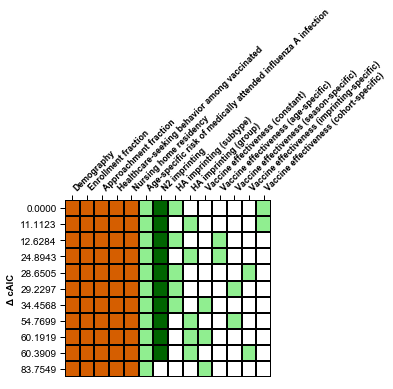

In [2]:
import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
import numpy as np
%matplotlib inline

df = pd.read_csv('../final_results_for_ms/15-100/result_summary.csv', index_col='Unnamed: 0')

pal = sns.color_palette('colorblind').as_hex()
flatui = ['white', pal[3], 'darkgreen', 'lightgreen']
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())


rcParams['font.sans-serif'] = 'arial'
sns.set_context('paper')
full_model='DAHNV'

final_df = pd.DataFrame(columns=['D', 'E', 'Ap', 'vac_cov', 'Nu', 'A', 'N2', 'H_sub','H_group', 'V_constant', 'V_age', 'V_season', 'V_imprinting', 'V_cohort', 'cAIC'])
row = 0


df = df.iloc[1:, ]

exclude = ['DAHVage_subtype', 'DAHVcohort_subtype', 'DAHNVageseason_subtype', 'DAHNVageseason_group',
           'DAHNVcohortseason_subtype', 'DAHNVcohortseason_group', 'DAVage', 'DAVcohort', 'DAVimprinting', 'DAVseason']


for model, r in df.iterrows():
    if model not in exclude:
        if 'Vage' in model:
            V = 'V_age'
            final_df.loc[row, V] = 1
        elif 'Vseason' in model:
            V = 'V_season'
            final_df.loc[row, V] = 1
        elif 'Vimprinting' in model:
            V = 'V_imprinting'
            final_df.loc[row, V] = 1
        elif 'Vcohort' in model:
            V = 'V_cohort'
            final_df.loc[row, V] = 1
        elif 'Vmean' in model:
            V = 'V_constant'
            final_df.loc[row, V] = 1

        if 'H' in model:
            if 'subtype' in model:
                final_df.loc[row, 'H_sub'] = 1
            elif 'group' in model:
                final_df.loc[row, 'H_group'] = 1

        if 'N' in model:

            if r['N2m'] != 0:
                final_df.loc[row, 'N2'] = 0.5
            else:
                final_df.loc[row, 'N2'] = 0.5
        final_df.loc[row, 'A'] = 1
        final_df.loc[row, 'D'] = 0.25
        final_df.loc[row, 'E'] = 0.25
        final_df.loc[row, 'Ap'] = 0.25
        final_df.loc[row, 'vac_cov'] = 0.25
        final_df.loc[row, 'Nu'] = 0.25
        #final_df.loc[row, '']
        final_df.loc[row, 'cAIC'] = r.cAIC
        row += 1

final_df = final_df.sort_values('cAIC')
final_df = final_df.fillna(0)
#final_df['cAIC'] = [np.exp(-0.5 * (c - min(final_df['cAIC']))) for c in final_df['cAIC']]
#final_df.index = ["%.4f" % (c/sum(final_df.cAIC)) for c in final_df['cAIC']]
final_df.index = ["%.4f" % (c - min(final_df['cAIC'])) for c in final_df['cAIC']]
final_df = final_df.loc[:, final_df.columns != 'cAIC']
final_df.columns = ['Demography',
                    'Enrollment fraction',
                    'Approachment fraction',
                    'Healthcare-seeking behavior among vaccinated',
                    'Nursing home residency',
                    'Age-specific risk of medically attended influenza A infection',
                    'N2 imprinting',
                    'HA imprinting (subtype)',
                    'HA imprinting (group)',
                    'Vaccine effectiveness (constant)',
                    'Vaccine effectiveness (age-specific)',
                    'Vaccine effectiveness (season-specific)',
                    'Vaccine effectiveness (imprinting-specific)',
                    'Vaccine effectiveness (cohort-specific)']
sns.heatmap(final_df, cmap=my_cmap, linewidths=1, linecolor='black', cbar=False, yticklabels=1)
ax = plt.gca()
ax.xaxis.tick_top()
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=45, ha='left', weight='bold')
plt.ylabel('Δ cAIC', weight='bold')
f = plt.gcf()
f.set_size_inches(5.5, 5.5)
plt.tight_layout()

(-0.5, 5.5)

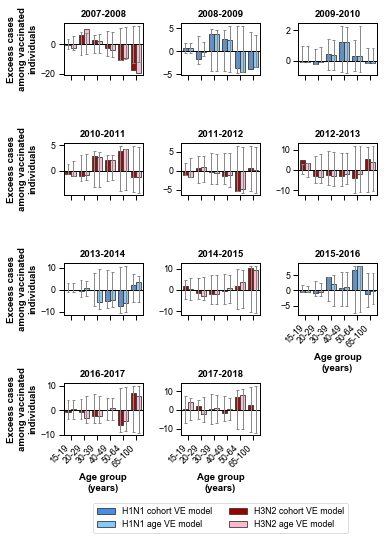

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams, patches
import seaborn as sns
import numpy as np
%matplotlib inline

H1_cohort_expectations = '../final_results_for_ms/15-100/DAHVcohort_subtype_H1_expectations.csv'
H1_age_expectations = '../final_results_for_ms/15-100/DAHVage_subtype_H1_expectations.csv'
H3_cohort_expectations = '../final_results_for_ms/15-100/DAHVcohort_subtype_H3_expectations.csv'
H3_age_expectations = '../final_results_for_ms/15-100/DAHVage_subtype_H3_expectations.csv'

def get_labels(age_classes):
    labels = []
    for l in age_classes:
        if l == '65-100':
            labels.append('65+')
        else:
            labels.append(l.replace('v',''))
    return labels

def season_to_label(season):
    if season == 2009.5:
        label = '2009Pan'
    else:
        label = str(int(season) - 1) + '-' + str(int(season))
    return label

rcParams['font.sans-serif'] = 'arial'
rcParams['font.size'] = 10
rcParams['font.weight'] = 'medium'
pal = sns.xkcd_palette(['dark sky blue', 'sky', 'deep red', 'baby pink']).as_hex()
h3_seasons = [2008, 2011, 2012, 2013, 2015, 2017, 2018]


kwargs={'linewidth': 1,
        'zorder': 10,
        'color': '#8a8a8a'}
subplot = 1
excess = []
resid_co = 0
resid_ag = 0
for season in range(2008, 2019):
    if season not in h3_seasons and season != 2009.5:
        df_cohort = pd.read_csv(H1_cohort_expectations, index_col=0)
        df_age = pd.read_csv(H1_age_expectations, index_col=0)
        df_cohort = df_cohort[df_cohort.vac_status == 'vaccinated']
        df_age = df_age[df_age.vac_status == 'vaccinated']
        
        plt.subplot(4,3,subplot)
        codf = df_cohort[df_cohort.season==season].copy()
        agdf = df_age[df_age.season==season].copy()
        
        
        final_df = pd.merge(codf, agdf, suffixes=['_co', '_ag'], on=['age_group', 'Observed'])
        final_df['Excess_co'] = final_df.Observed - final_df.Prediction_co

        
        
        final_df['Excess_ag'] = final_df.Observed - final_df.Prediction_ag
        new_rows = []
        x = []
        y1 = []
        y2 = []
        x1 = []
        x2 = []
        start = -0.2
        for index, row in final_df.iterrows():
            new_rows.append([row.age_group, row.Excess_co, 'Cohort VE'])
            new_rows.append([row.age_group, row.Excess_ag, 'Age VE'])
            x.append(start)
            x.append(start + 0.4)
            
            y2.append(row.ci_high_co - row.Prediction_co)
            y2.append(row.ci_high_ag - row.Prediction_ag)
            y1.append(row.ci_low_co - row.Prediction_co)
            y1.append(row.ci_low_ag - row.Prediction_ag)
            
            x1.append(start-0.1)
            x2.append(start+0.1)
            
            x1.append(start + 0.4 - 0.1)
            x2.append(start + 0.4 + 0.1)
            start += 1
        plotdf = pd.DataFrame(new_rows, columns = ['Age group', 'Excess cases', 'VE type'])
        plt.vlines(x=x, ymin=y1, ymax=y2, **kwargs)
        plt.hlines(y=y1, xmin = x1, xmax=x2, **kwargs)
        plt.hlines(y=y2, xmin = x1, xmax=x2, **kwargs)
        ax = sns.barplot(data=plotdf, x='Age group', y='Excess cases', hue='VE type', palette=pal[0:2],edgecolor='#333333')
        ax.legend_.remove()
        check1 = final_df[(final_df.Observed < final_df.ci_low_ag) | (final_df.Observed > final_df.ci_high_ag)].copy()
        check2 = final_df[(final_df.Observed < final_df.ci_low_co) | (final_df.Observed > final_df.ci_high_co)].copy()
        

    elif season != 2009.5:
        df_cohort = pd.read_csv(H3_cohort_expectations, index_col=0)
        df_age = pd.read_csv(H3_age_expectations, index_col=0)
        df_cohort = df_cohort[df_cohort.vac_status == 'vaccinated']
        df_age = df_age[df_age.vac_status == 'vaccinated']
        
        plt.subplot(4,3,subplot)
        codf = df_cohort[df_cohort.season==season].copy()
        agdf = df_age[df_age.season==season].copy()

        
        final_df = pd.merge(codf, agdf, suffixes=['_co', '_ag'], on=['age_group', 'Observed'])
        final_df['Excess_co'] = final_df.Observed - final_df.Prediction_co
        
        final_df['Excess_ag'] = final_df.Observed - final_df.Prediction_ag

        
        new_rows = []
        x = []
        x1 = []
        x2 = []
        y1 = []
        y2 = []
        start = -0.2
        for index, row in final_df.iterrows():
            new_rows.append([row.age_group, row.Excess_co, 'Cohort VE'])
            new_rows.append([row.age_group, row.Excess_ag, 'Age VE'])
            x.append(start)
            x.append(start + 0.4)
            
            y2.append(row.ci_high_co - row.Prediction_co)
            y2.append(row.ci_high_ag - row.Prediction_ag)
            y1.append(row.ci_low_co - row.Prediction_co)
            y1.append(row.ci_low_ag - row.Prediction_ag)
            
            x1.append(start-0.1)
            x2.append(start+0.1)
            
            x1.append(start + 0.4 - 0.1)
            x2.append(start + 0.4 + 0.1)
            start += 1
        plotdf = pd.DataFrame(new_rows, columns = ['Age group', 'Excess cases', 'VE type'])
        plt.vlines(x=x, ymin=y1, ymax=y2, **kwargs)
        plt.hlines(y=y1, xmin = x1, xmax=x2, **kwargs)
        plt.hlines(y=y2, xmin = x1, xmax=x2, **kwargs)
        ax = sns.barplot(data=plotdf, x='Age group', y='Excess cases', hue='VE type', palette=pal[2:],edgecolor='#333333')
        ax.legend_.remove()
        check1 = final_df[(final_df.Observed < final_df.ci_low_ag) | (final_df.Observed > final_df.ci_high_ag)].copy()
        check2 = final_df[(final_df.Observed < final_df.ci_low_co) | (final_df.Observed > final_df.ci_high_co)].copy()
        
    plt.title(str(season - 1) + '-' + str(season), weight='bold')
    plt.axhline(0, color='black', linewidth=1)
    ticks, labels = plt.xticks()
    if subplot not in [1,4,7,10]:
        plt.ylabel('')
    else:
        plt.ylabel('Exceess cases\namong vaccinated\nindividuals', weight='bold')
    if subplot not in [9, 10, 11]:
        plt.xlabel('')
        plt.xticks(ticks, [])
    else:
        plt.xlabel('Age group\n(years)', weight='bold')
        plt.xticks(ticks, labels, rotation=45, ha='right')
    plt.gcf().align_ylabels()
    subplot += 1

xmin, xmax = plt.xlim()
plt.gcf().set_size_inches(5.5, 7)
plt.tight_layout()
b1, = plt.bar([10], [0], color=pal[0], edgecolor='#333333', label='H1N1 unvaccinated')
b2, = plt.bar([10], [0], color=pal[1], edgecolor='#333333', label='H1N1 vaccinated')
b3, = plt.bar([10], [0], color=pal[2], edgecolor='#333333', label='H3N2 unvaccinated')
b4, = plt.bar([10], [0], color=pal[3], edgecolor='#333333', label='H3N2 vaccinated')

plt.legend((b1, b2,b3,b4),
           ('H1N1 cohort VE model',
            'H1N1 age VE model',
            'H3N2 cohort VE model',
            'H3N2 age VE model'),
           loc='center',
           bbox_to_anchor=(0.5, -1.6),
           ncol=2)
plt.xlim(xmin, xmax)